<a href="https://www.scinbre.org/learning/bioinformatics-workshops/2024-summer-workshops"><img src="https://i.ibb.co/N6W5kPM/inbre-header.png" alt="inbre-header" border="0"></a>


### Machine Learning in Python
### June 11th, 2024

# First hour - Introduction to SciKit-Learn

Scikit-learn is an open-source machine-learning library that supports supervised (with labels) and unsupervised learning (without labels). It also provides various tools for model fitting, data preprocessing, model selection, model evaluation, and many other utilities.

It has tons of built-in machine-learning algorithms. We will take a look at the library as a whole, and then explore two specific ML algorithms one unsupervised (no labels) and one supervised (with labels).

## Machine Learning



> Machine learning enables computers to learn from data and make decisions or predictions without being explicitly programmed to do so.

We can split ML into four main subcategories:

* Supervised
* Unsupervised
* Semi-Supervised
* Reinforcement

We will focus on Supervised and Unsupervised. If you want to learn more about semi-supervised learning, you can have a look at [this page](https://scikit-learn.org/stable/modules/semi_supervised.html). For reinforcement learning, have a look at [this page](https://stable-baselines.readthedocs.io/en/master/).

##Supervised vs Unsupervised

The main difference between supervised and unsupervised learning is related to the availability (supervised) or not (unsupervised) of labels for corresponding to the input data. Here are two great illustrations from [Geeks for Geeks](https://www.geeksforgeeks.org/types-of-machine-learning/) explaining this.

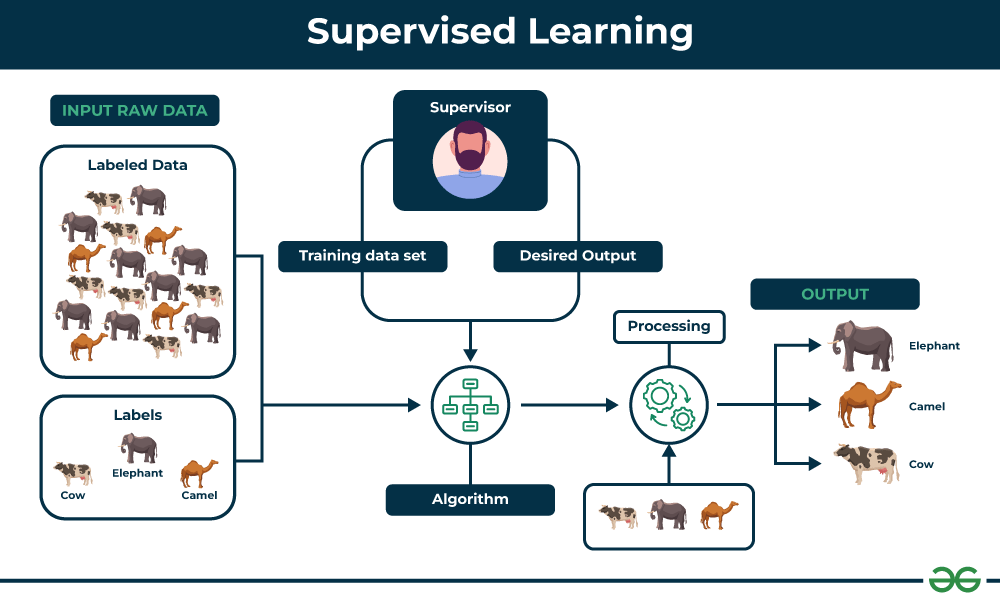

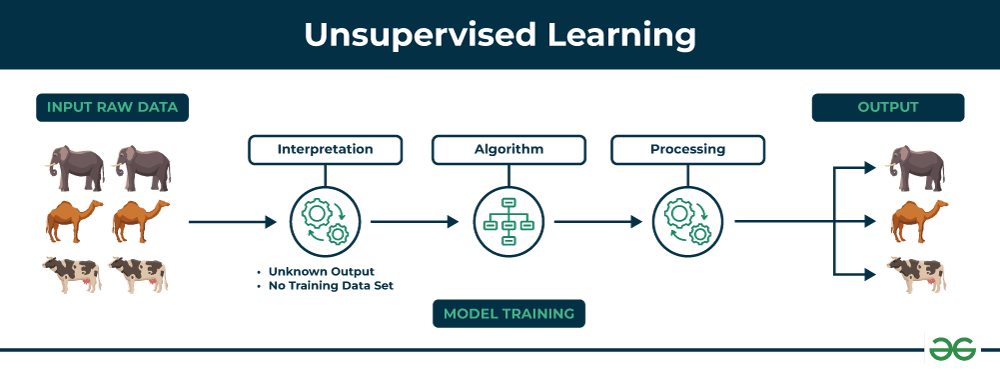

Both supervised and unsupervised have two main subcategories, depending on whether they are working with categorical (discrete) or continuous data:

 Supervised:
*  **Classification**: We train a computer using labeled cat and dog images (teaching). Then, it can predict the class (cat or dog) of a new, unseen image.

*  **Regression**: We train on data containing **features** of houses (e.g., their size, location, etc.) and their selling price (**labels**). Then given the features of a new house, we predict its selling price as a continuous variable.

Unsupervised:

*  **Clustering**: Given some data points, these algorithms find groups of points (i.e., clusters) that are more similar and belong together.
*  **Dimensionality reduction**: Given a multidimensional dataset, these algorithms find a lower-dimensional space that preserves the essence of the original data.

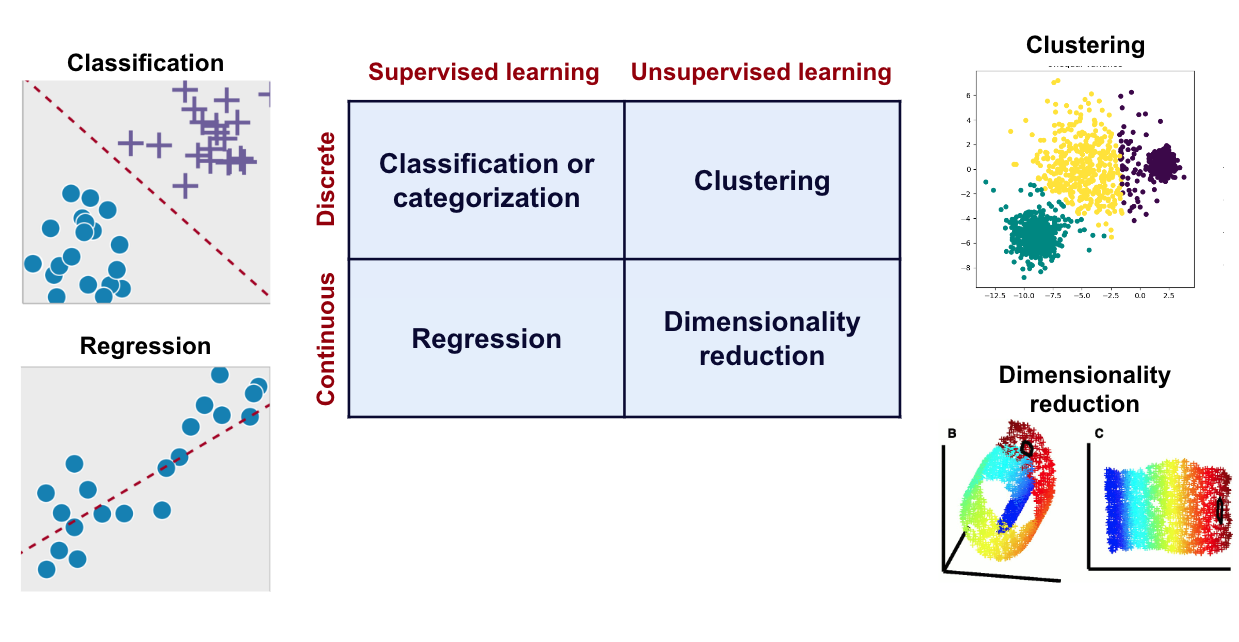

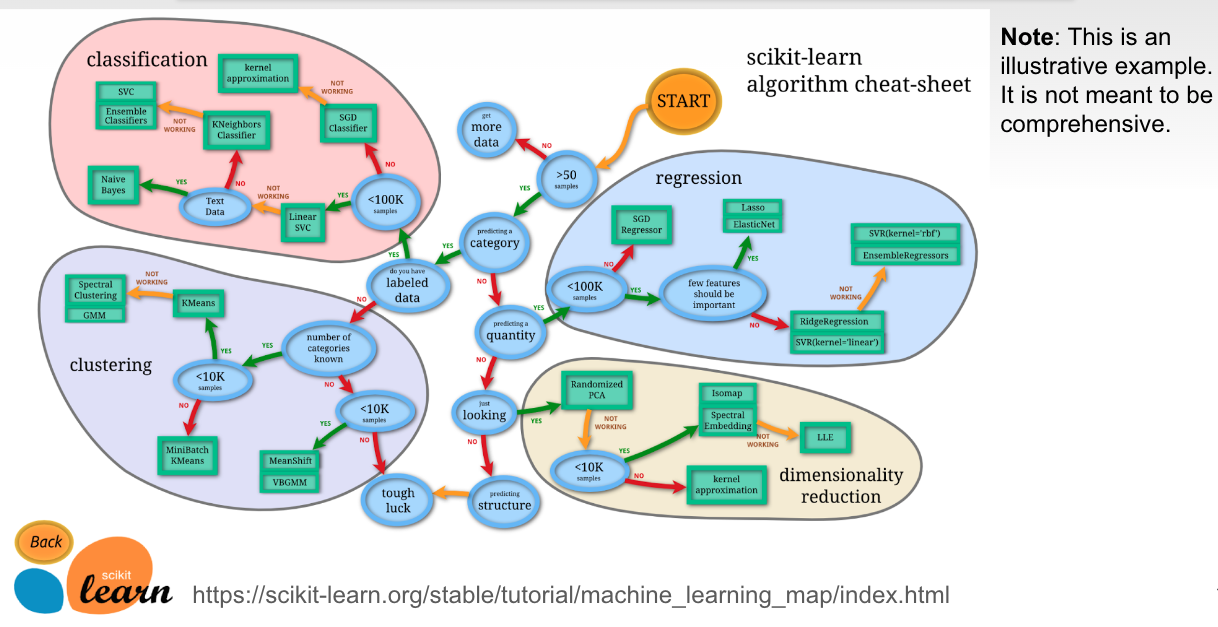

## Scikit-learn Fundamentals

The basic workflow for using scikit-learn involves:

1.   Loading the data
2.   Preprocessing the data
3.   Splitting the data into training and testing sets
4.   Choosing a model
5.   Training the model
6.   Making predictions
7.   Evaluating the model

## Supervised Learning example

#### Step 1: Load the Data
Scikit-learn comes with several built-in datasets, including the Iris dataset. We will use this dataset to classify iris flowers into three species.

**Note**: To install scikit-learn, we would use `pip install scikit-learn` but when we import we used `import sklearn`.  Scikit-learn is installed by default in Colab.

In [ ]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.datasets import load_iris

# Load the Iris dataset that we have seen before!
iris = load_iris()
X = iris.data  # Features
y = iris.target  # labels

#### Step 2: Preprocess the Data
In this simple example, the Iris dataset does not require much preprocessing. However, in real-world datasets, you might need to handle missing values, normalize data, or encode categorical variables.

#### Step 3: Split the Data
We will split the data into training and testing sets to evaluate the model's performance.

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# test_size represent the proportion of the dataset to include in the test split

# random_state controls the shuffling applied to the data before applying the split.
# We have previously seen this concept refered to as the "seed" of the random number generator.
# Pass an int for reproducible output across multiple function calls.

#### Step 4: Choose a Model
For this example, we will use the K-Nearest Neighbors (KNN) classifier. [Click here](https://www.youtube.com/watch?v=0p0o5cmgLdE&ab_channel=IntuitiveMachineLearning) if you would like to listen to a 2-3-minute video explaining KNN.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create the KNN model
knn = KNeighborsClassifier(n_neighbors=3) #we will learn about the model soon


#### Step 5: Train the Model
We will train the KNN model using the training data.

In [ ]:
# Train the model
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

#### Step 6: Make Predictions
After training the model, we will use it to make predictions on the testing data.

In [ ]:
# Make predictions
y_pred = knn.predict(X_test)


#### Step 7: Evaluate the Model
Finally, we will evaluate the performance of the model using accuracy.

In [ ]:
from sklearn.metrics import accuracy_score

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


We can also compute the **confusion matrix**. This matrix shows how often an object from one class is confused with another class by the classifier.

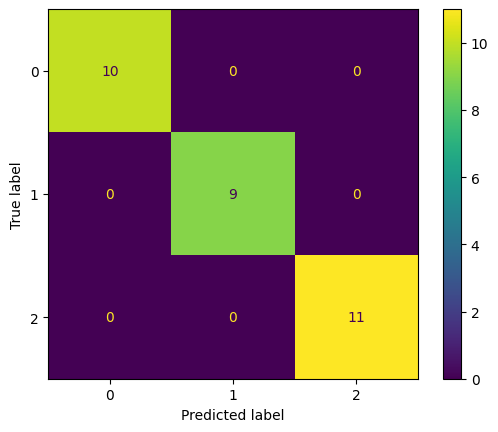

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

**Note on performance assessment:**

* Accuracy: Imagine you classified the Iris flowers (Sepal & Petal measurements) into Iris Setosa, Iris Versicolor, and Iris Virginica. Accuracy tells you the percentage of flowers you correctly classified into their respective species.

* Precision/Positive predictive value: Imagine you identified a flower as Iris Setosa. Precision tells you how likely it is for this flower to truly be Iris Setosa. A high precision means most "Iris Setosa" identifications were actually that species.

* Recall/Sensitivity/True positive rate: Imagine you are trying to find all the Iris Versicolor flowers. Recall tells you how well you did at identifying all the Iris Versicolor flowers. A high recall means you did not miss many Iris Versicolor and caught most of them.

* F1 score (**often used**): A high F1 score means you are good at identifying each Iris species accurately (precision) and also good at finding most flowers of each species (recall).

## Exercises

Now that you have a basic understanding of scikit-learn, try the following exercise:

1.   Load the Iris dataset using scikit-learn.
2.   Split the data into training and testing sets.
3. Train a Decision Tree classifier on the training data. **Note:** A Decision Tree is another classifier, similar to KNN. You can import it with `from sklearn.tree import DecisionTreeClassifier` and you can see its documentation with `?DecisionTreeClassifier`. Do not let the large number of possible arguments discourage you. They all have default values, so you can get this classifier by using simply `my_classifier = DecisionTreeClassifier()`.
4. Make predictions on the testing data.
5. Evaluate the model's performance using accuracy, precision (`sklearn.metrics.precision_score`), and recall (`sklearn.metrics.recall_score`).

# Second hour - K-Means and KNN

##K-Means

We will take a look at K-Means which is an unsupervised clustering algorithm. [Click here](https://www.youtube.com/watch?v=_aWzGGNrcic&ab_channel=VictorLavrenko) if you would like to listen to a 7-minute video explaining the K-Means algorithm. [Here](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/) is an app that allows you to explore interactively how K-Means work.

Starting with a random set of points:

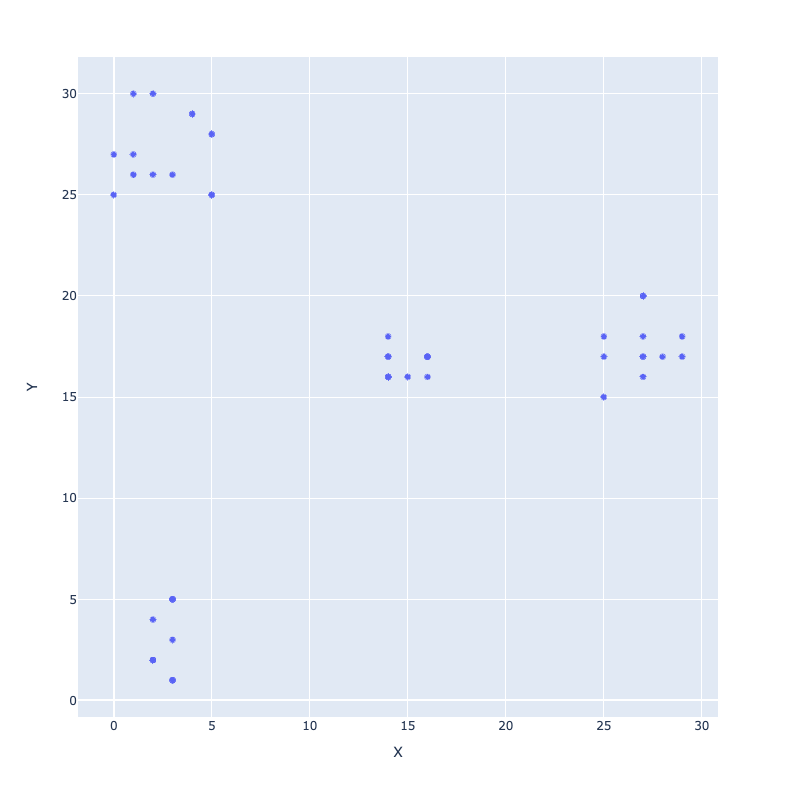

Here is an example of a k-Mean solution using k=3 (3 clusters):

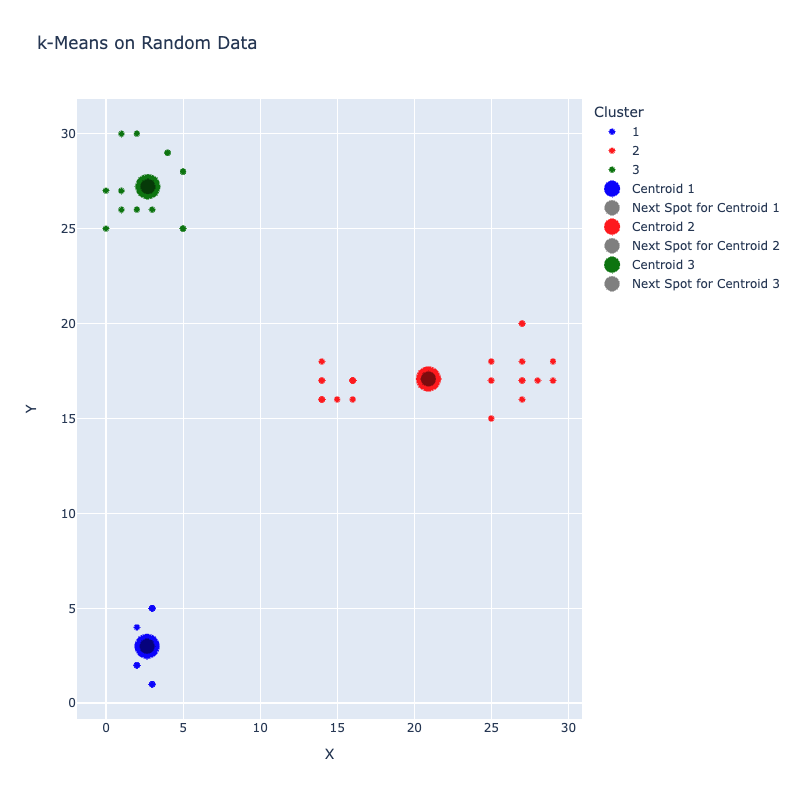

Here is an example of a k-Mean solution using k=4:

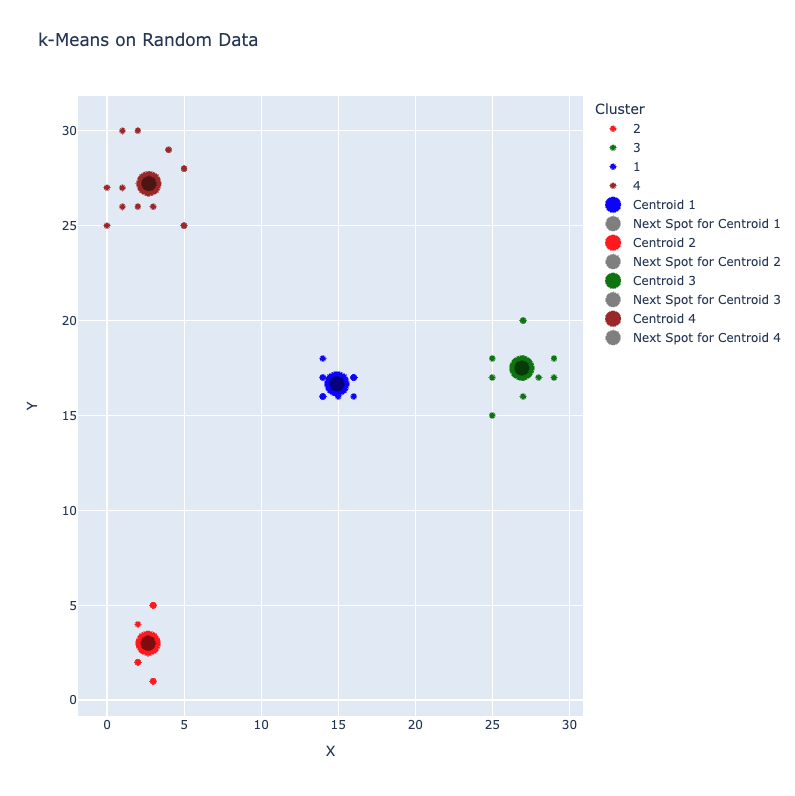

Within-Cluster Sum of Squares (WCSS) is a metric used to evaluate the final clustering we find. It is calculated by summing the squared distances between each data point and its assigned centroid. A lower WCSS value means that the data points are closer to their respective centroids, which is desirable in clustering.

What if we have ```n``` data points and ```n``` clusters? Below is an illustration of the value of `WCSS` as a function of `k`.

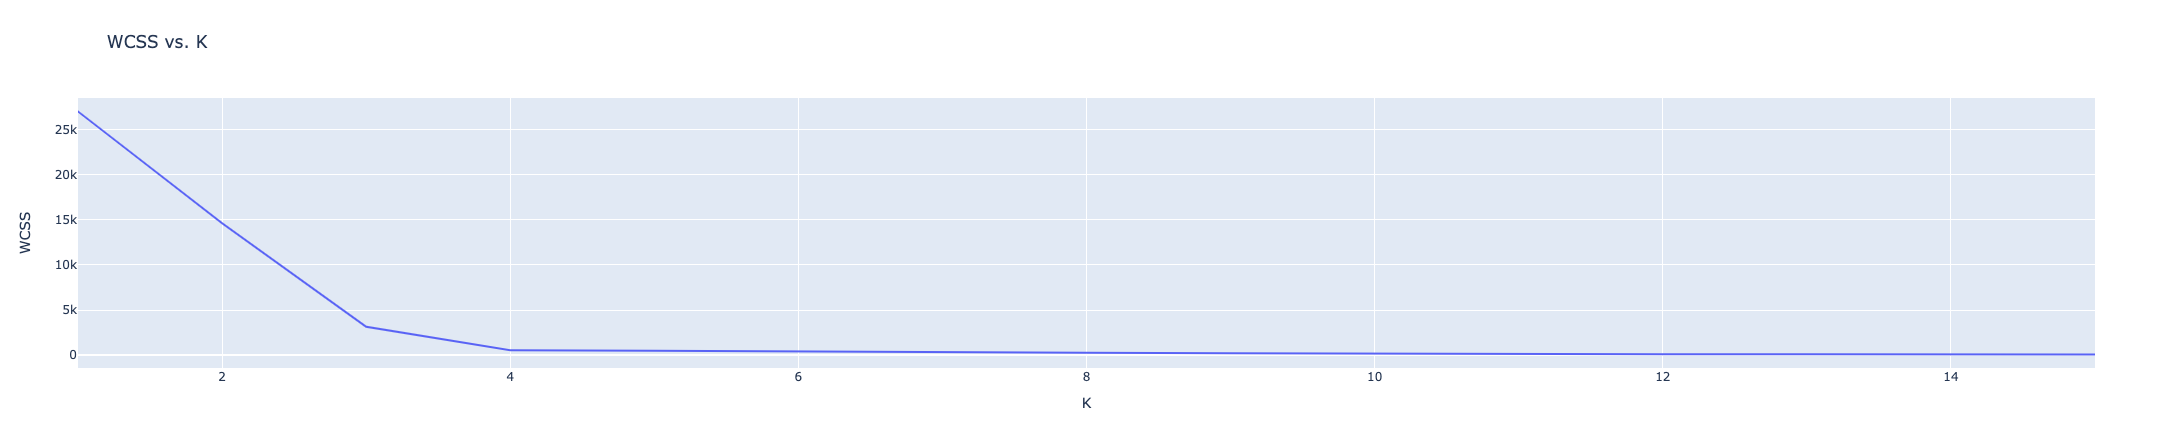

With k-Means, the user needs to define the value of `k` (i.e., the best value of `k` is not automatically estimated). Also, note that the value of `WCSS` is monotonically decreasing, so `k` cannot be chosen as the value that minimizes the `WCSS`. A classical way to determine this value is to use the elbow method, which takes `k` as the point where you can see an elbow in the plot above (4 in this case).

**Some additional resources**

* [See this page](https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation) for more information on evaluating clustering performance.

* Various clustering algorithms available in scikit-learn:

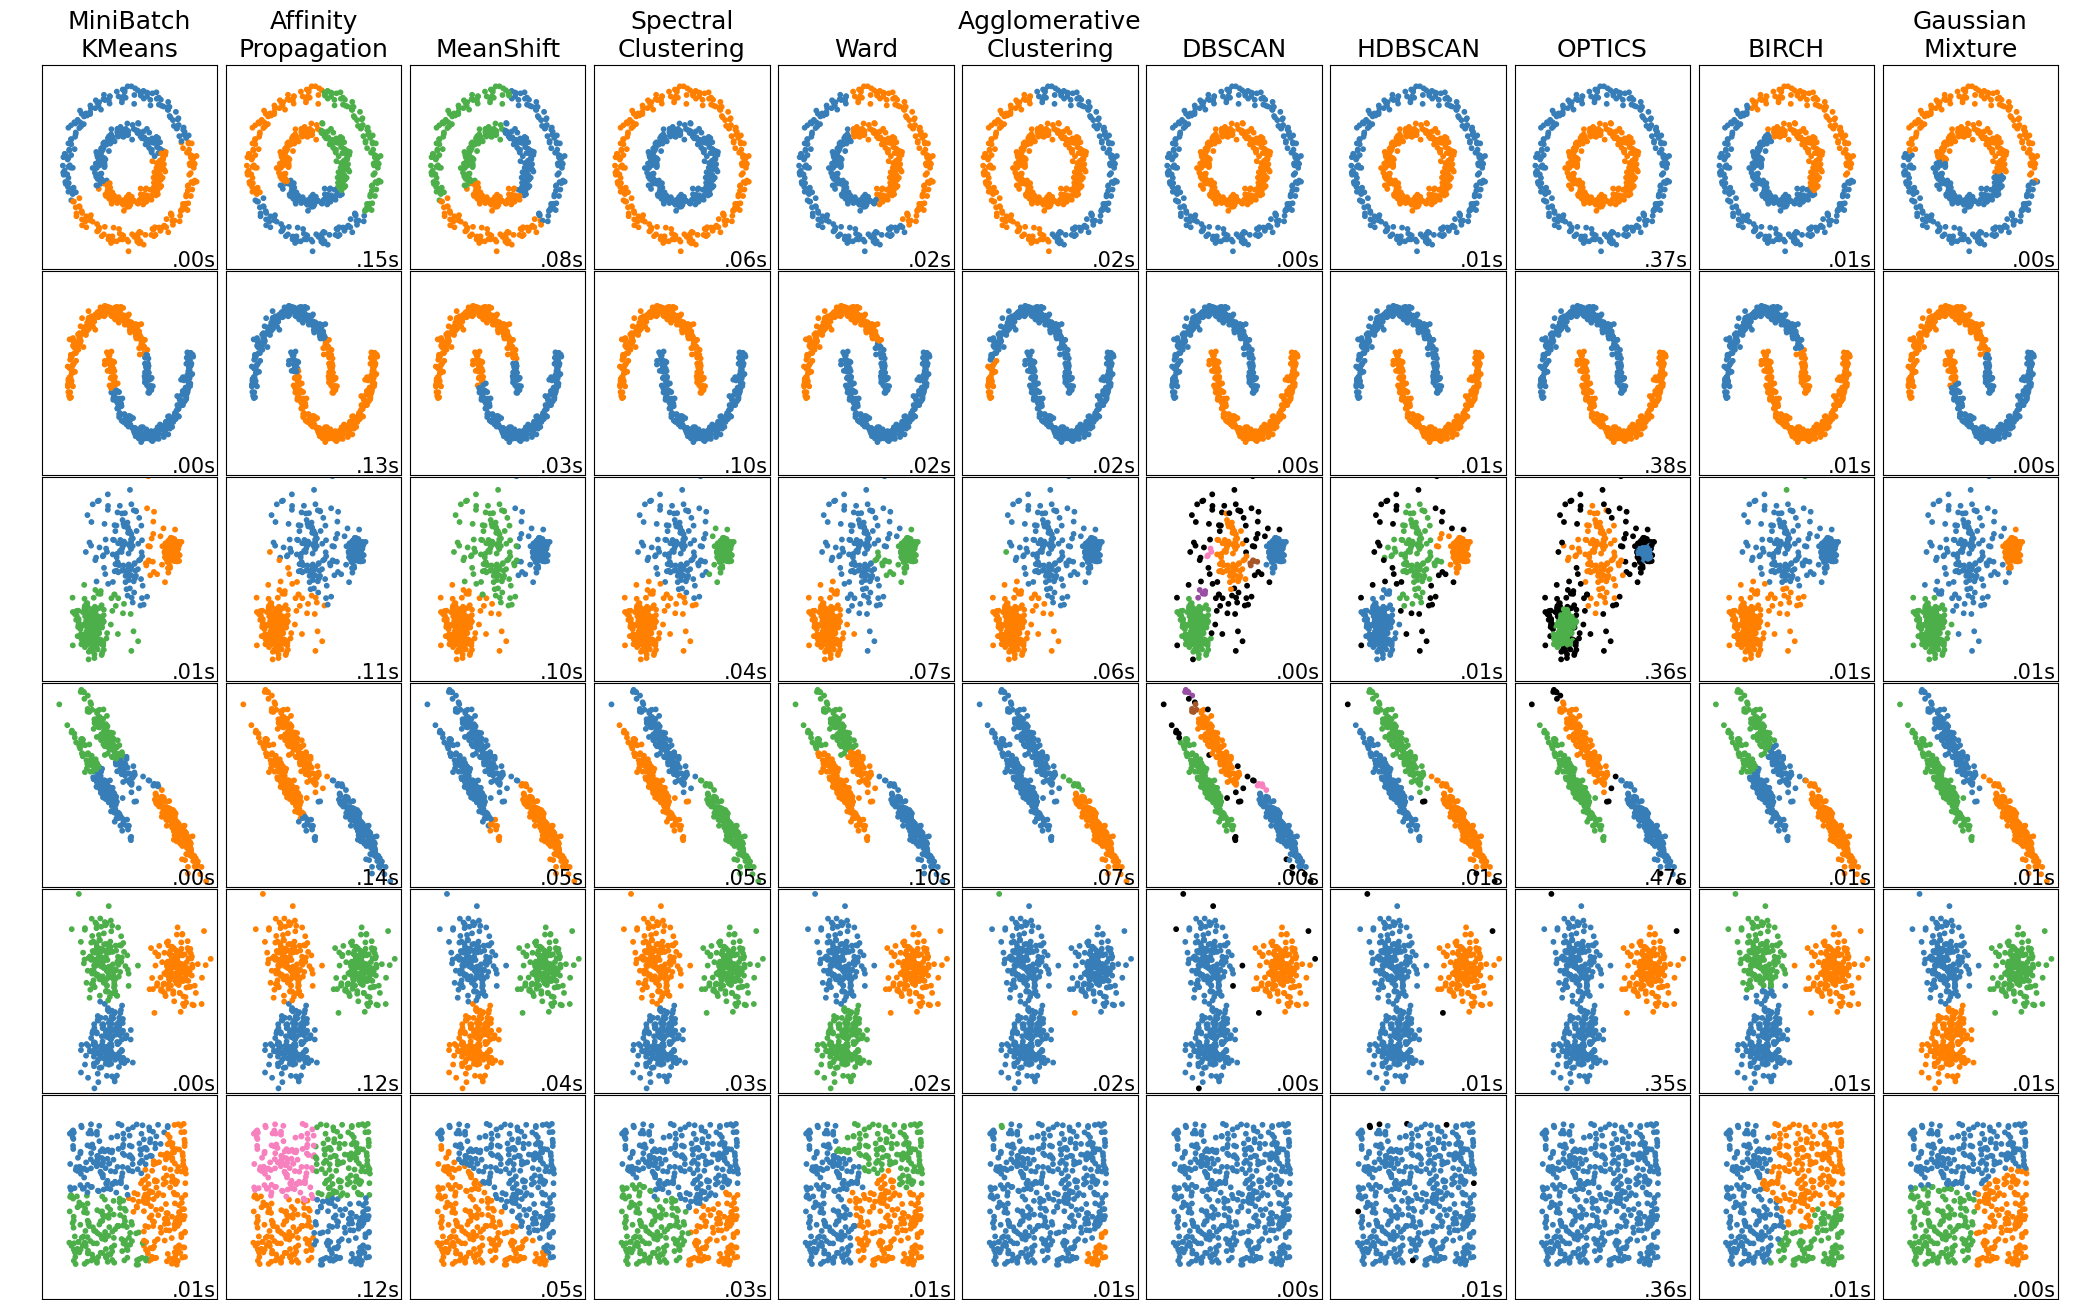

####Clustering with k-Means


1. We load the Iris dataset from scikit-learn and display the first five rows.

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()
X = iris.data    # Features
y = iris.target  # Labels

# Create a DataFrame for better visualization
iris_df = pd.DataFrame(X, columns=iris.feature_names)
iris_df['species'] = y

# Display the first five rows
print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


2. We perform a k-means clustering with k=3 on the Iris dataset and print the cluster centers.

In [ ]:
from sklearn.cluster import KMeans

# Perform k-means clustering
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
'''
This means that the k-means algorithm will run 10 times with different centroid
seeds. The final result will be the best output in terms of inertia
(sum of squared distances to the nearest cluster center).
'''

kmeans.fit(X)

# Print cluster centers
print('Cluster Centers:')
print(kmeans.cluster_centers_)


Cluster Centers:
[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


3. We create a scatter plot of the Iris dataset using the first two features and the centroids of the clusters for the first two features. We color the points by their cluster labels.

**Note:**
* ```kmeans.labels_``` returns an array of labels corresponding to the data points.
* ```kmeans.cluster_centers_``` returns a 2D array with each row corresponding to the centroid of a cluster.

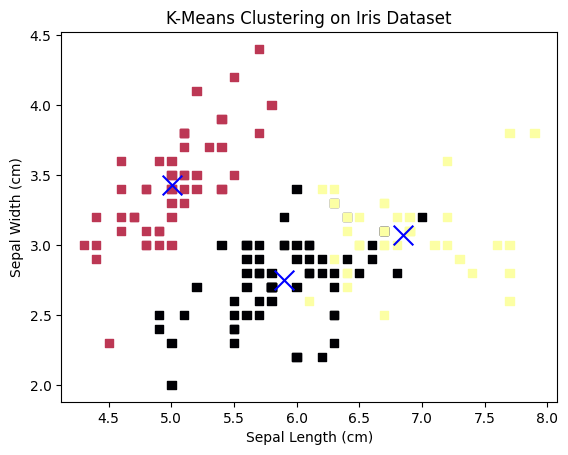

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of the first two features
#plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_) #Simple awnser
plt.scatter(X[:, 0], X[:, 1], cmap='inferno', c=kmeans.labels_, marker='s') # Cool version of the same thing


#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red') #Simple awnser
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='blue', s=200, marker='x')

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('K-Means Clustering on Iris Dataset')
plt.show()

'''
You should see the three clusters of points each with diffrent color.
The cluster centers are marked with 'x'.
Note how the different classes are grouped together and the position of
the cluster center compared to the points.
''';


4. We now compare the clustering results with the true labels of the Iris dataset to assess how well the k-means clustering matches the actual species.

Confusion Matrix:

[[50  0  0]
 [ 0 48  2]
 [ 0 14 36]]


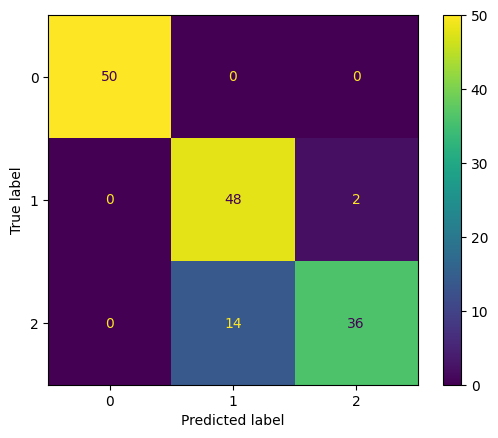

In [ ]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n')

print(confusion_matrix(y, kmeans.labels_))

ConfusionMatrixDisplay.from_predictions(y, kmeans.labels_);


This looks worse than random, but it is just because the labels are matched to the classes arbitrarily. Our attribution of labels 1 and 0 needs to be swapped for this comparison to make sense.

In [ ]:
kmeans.labels_[kmeans.labels_ == 1] = 5
kmeans.labels_[kmeans.labels_ == 0] = 1
kmeans.labels_[kmeans.labels_ == 5] = 0

Confusion Matrix:

[[50  0  0]
 [ 0 48  2]
 [ 0 14 36]]


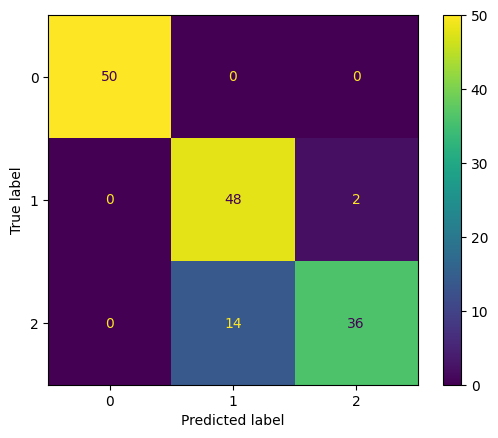

In [ ]:
print('Confusion Matrix:\n')
print(confusion_matrix(y, kmeans.labels_))

ConfusionMatrixDisplay.from_predictions(y, kmeans.labels_);

## Exercises

For this exercise, we start by creating an artificial dataset.

In [1]:
# As per https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(X)

Here is how this dataset looks like:

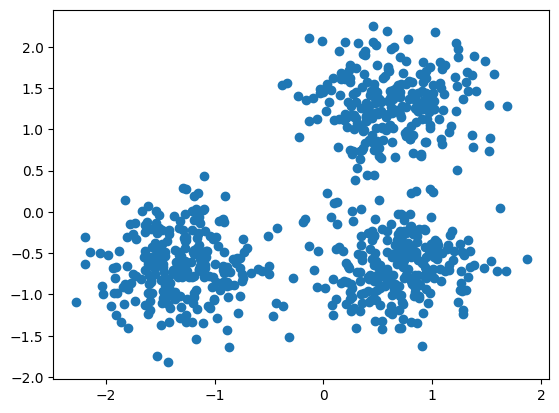

In [2]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1])

1. Use the DBSCAN algorithm to cluster this dataset.

2. Show (plot) the result of this clustering. Note that samples with a label -1 are noisy (unreliable).

# Homework

1. Above, we showed an illustration comparing the various clustering algorithms available in scikit-learn. Choose three.
2. We also gave a [link](https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation) listing various measures to assess the quality of a clustering solution (e.g., silhouette). Choose three such measures.
3. Create an artificial dataset using the code we provided in the exercise.
4. Determine, given this dataset, your three clustering algorithms, and your three metrics, which clustering algorithm performed the best.

# Extra material

## Explanation of K-Nearest Neighbors (KNN) Building off of K-Means

### K-Means Clustering Recap:
K-means clustering is an **unsupervised** learning algorithm used to partition data into k clusters based on feature similarity. It works by iteratively assigning data points to the nearest cluster centroid and updating the centroids to be the mean of the points assigned to them. This process repeats until the centroids converge.

### Transition to K-Nearest Neighbors (KNN):
While k-means is useful for identifying clusters within data, K-Nearest Neighbors (KNN) is a **supervised** learning algorithm used for classification (and regression). Unlike k-means, which identify clusters without prior knowledge of labels, KNN requires labeled data to make predictions about new, unlabeled data points.

### K-Nearest Neighbors Algorithm (KNN)

KNN is a rather simple algorithm that classifies a data point based on the majority class among its
k nearest neighbors in the feature space. Here is how it works:

1.   For a given test data point, calculate the distance (e.g. Euclidean distance) between the test point and all training points.
2.   Identify the k nearest neighbors based on these distances.
3. Assign the test point the label that is most common among its
k nearest neighbors.

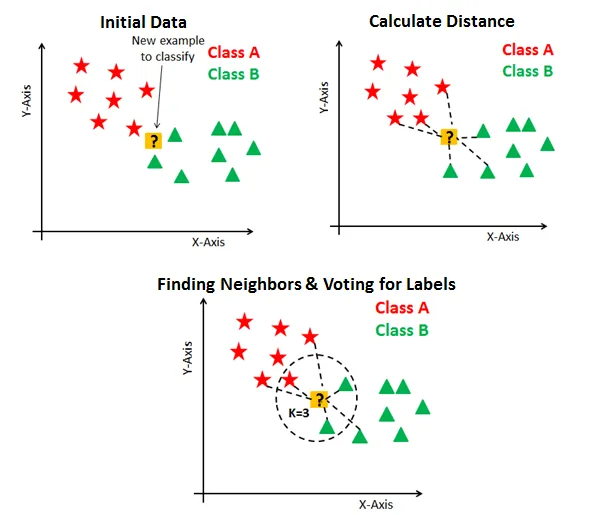

[image from Towards Data Science:
Deepthi A R](https://towardsdatascience.com/knn-visualization-in-just-13-lines-of-code-32820d72c6b6)

## K Means in depth

Lets take a look at some data.

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=[0.3, 0.254, 0.27, 0.5, 0.53, 0.55, 0.8], y=[0,0,0,0,0,0,0], mode='markers', marker_size=20, marker_color='grey',
))

fig.update_xaxes(showgrid=False,range=[0,1])
fig.update_yaxes(showgrid=False,
                 zeroline=True, zerolinecolor='black', zerolinewidth=3,
                 showticklabels=False)
fig.update_layout(height=200, plot_bgcolor='white')
fig.show()

We would say that there are 3 Custers but how would a computer do this?

---

Some things to note:

*   For k-means you need to define how many clusters there will be. Then, the algorithm will find the points that belong to each cluster.
*   What makes a data point more similar to one point versus another point? The closer together they are, the more similar; the farther apart, the less similar.
* K-Means uses "centroids". These are just the center of the cluster. Each cluster has a center, or centroid.


In [ ]:
#all randomly assign all 3 Centroids.
import random

# Data points
points = [0.3, 0.254, 0.27, 0.5, 0.53, 0.55, 0.8]

# Randomly pick 3 points to be centroids
centroids = random.sample(points, 3)
colors = ['red', 'green', 'blue']

fig = go.Figure()

# Plot data points
fig.add_trace(go.Scatter(
    x=points, y=[0]*len(points), mode='markers', marker=dict(size=20, color='grey')
))

# Plot centroids
for i, centroid in enumerate(centroids):
    fig.add_trace(go.Scatter(
        x=[centroid], y=[0], mode='markers', marker=dict(size=20, color=colors[i], symbol='x', line=dict(width=1, color='black')),
        name=f'Centroid {i+1}'
    ))

fig.update_xaxes(showgrid=False, range=[0, 1])
fig.update_yaxes(showgrid=False,
                 zeroline=True, zerolinecolor='black', zerolinewidth=3,
                 showticklabels=False)
fig.update_layout(height=200, plot_bgcolor='white', title='Randomly Selected Centroids')
fig.show()



Now, let us calculate the distance from the first non-centroid point to each centroid.


In [ ]:
import numpy as np

# Calculate distances from the first point to each centroid
points.sort()
first_point = None
i = 0
while first_point is None:
  if points[i] in centroids:
    i += 1
  else:
    first_point = points[i]
distances = [np.abs(first_point - centroid) for centroid in centroids]

fig = go.Figure()

# Plot data points
fig.add_trace(go.Scatter(
    x=points, y=[0]*len(points), mode='markers', marker=dict(size=20, color='grey')
))

# Plot centroids
for i, centroid in enumerate(centroids):
    fig.add_trace(go.Scatter(
        x=[centroid], y=[0], mode='markers', marker=dict(size=30, color=colors[i], symbol='x', line=dict(width=1, color='black')),
        name=f'Centroid {i+1}'
    ))

heights = [20,30,40]
# Plot horizontal lines for distances
for i, centroid in enumerate(centroids):
    fig.add_shape(
        type="line",
        x0=first_point, y0=heights[i],
        x1=centroid, y1=heights[i],
        line=dict(color=colors[i], width=2, dash='dash')
    )
    # fig.add_annotation(
    #     x=(first_point + centroid) / 2, y=0.05,
    #     text=f'{distances[i]:.2f}', showarrow=False,
    #     font=dict(color=colors[i])
    # )

fig.update_xaxes(showgrid=False, range=[0, 1])
fig.update_yaxes(showgrid=False,
                 zeroline=True, zerolinecolor='black', zerolinewidth=3,
                 showticklabels=False)
fig.update_layout(height=200, plot_bgcolor='white', title='Distances from the First Point to Each Centroid')
fig.show()


We assign the point to belong to the closest centroid, and then, do that for all the points.

In [ ]:
# Calculate distances from each point to each centroid
def closest_centroid(point, centroids):
    distances = [np.abs(point - centroid) for centroid in centroids]
    return np.argmin(distances)

# Assign each point to the closest centroid
assignments = [closest_centroid(point, centroids) for point in points]

fig = go.Figure()

# Plot data points with assigned colors
for i, point in enumerate(points):
    fig.add_trace(go.Scatter(
        x=[point], y=[0], mode='markers',
        marker=dict(size=20, color=colors[assignments[i]], symbol='circle'),
        name=f'Point {i+1} assigned to Centroid {assignments[i]+1}'
    ))

# Plot centroids
for i, centroid in enumerate(centroids):
    fig.add_trace(go.Scatter(
        x=[centroid], y=[0], mode='markers',
        marker=dict(size=20, color=colors[i], symbol='x', line=dict(width=2, color='black')),
        name=f'Centroid {i+1}'
    ))

fig.update_xaxes(showgrid=False, range=[0, 1])
fig.update_yaxes(showgrid=False,
                 zeroline=True, zerolinecolor='black', zerolinewidth=3,
                 showticklabels=False)
fig.update_layout(height=200, plot_bgcolor='white', title='Points Assigned to the Closest Centroid')
fig.show()


Now that we have every point belonging to a centroid, we update the centroids with the new mean of all the points within the cluster.

In [ ]:

# Calculate new centroids
new_centroids = []
for i in range(len(centroids)):
    assigned_points = [points[j] for j in range(len(points)) if assignments[j] == i]
    new_centroid = np.mean(assigned_points) if assigned_points else centroids[i]
    new_centroids.append(new_centroid)

# Assign each point to the closest new centroid
new_assignments = [closest_centroid(point, new_centroids) for point in points]

fig = go.Figure()

# Plot data points with assigned colors
for i, point in enumerate(points):
    fig.add_trace(go.Scatter(
        x=[point], y=[0], mode='markers',
        marker=dict(size=20, color=colors[new_assignments[i]], symbol='circle'),
        name=f'Point {i+1} assigned to New Centroid {new_assignments[i]+1}'
    ))

# Plot new centroids
for i, new_centroid in enumerate(new_centroids):
    fig.add_trace(go.Scatter(
        x=[new_centroid], y=[0], mode='markers',
        marker=dict(size=20, color=colors[i], symbol='x', line=dict(width=2, color='black')),
        name=f'New Centroid {i+1}'
    ))

fig.update_xaxes(showgrid=False, range=[0, 1])
fig.update_yaxes(showgrid=False,
                 zeroline=True, zerolinecolor='black', zerolinewidth=3,
                 showticklabels=False)
fig.update_layout(height=200, plot_bgcolor='white', title='Updated Centroids')
fig.show()

We will repeat steps 3 (assign points to a cluster) and 4 (update the centroids) until the centroids no longer change.

In [ ]:
import time

# Function to calculate the closest centroid for a point
def closest_centroid(point, centroids):
    distances = [np.abs(point - centroid) for centroid in centroids]
    return np.argmin(distances)

# Function to plot the current state
def plot_state(points, centroids, assignments, title):
    fig = go.Figure()

    # Plot data points with assigned colors
    for i, point in enumerate(points):
        fig.add_trace(go.Scatter(
            x=[point], y=[0], mode='markers',
            marker=dict(size=20, color=colors[assignments[i]], symbol='circle'),
            name=f'Point {i+1} assigned to Centroid {assignments[i]+1}'
        ))

    # Plot centroids with black outlines
    for i, centroid in enumerate(centroids):
        fig.add_trace(go.Scatter(
            x=[centroid], y=[0], mode='markers',
            marker=dict(size=20, color=colors[i], symbol='x', line=dict(width=1, color='black')),
            name=f'Centroid {i+1}'
        ))

    fig.update_xaxes(showgrid=False, range=[0, 1])
    fig.update_yaxes(showgrid=False,
                     zeroline=True, zerolinecolor='black', zerolinewidth=3,
                     showticklabels=False)
    fig.update_layout(height=200, plot_bgcolor='white', title=title)
    fig.show()

In [ ]:
# Main loop to perform k-means steps until convergence
converged = False
iteration = 0
while not converged:
    iteration += 1
    # Step 3: Assign each point to the closest centroid
    assignments = [closest_centroid(point, centroids) for point in points]

    # Step 4: Update centroids to the mean value of all its points
    new_centroids = []
    for i in range(len(centroids)):
        assigned_points = [points[j] for j in range(len(points)) if assignments[j] == i]
        new_centroid = np.mean(assigned_points) if assigned_points else centroids[i]
        new_centroids.append(new_centroid)

    # Step 5: Check for convergence (if centroids do not change)
    if np.allclose(centroids, new_centroids):
        converged = True
    centroids = new_centroids

    # Plot the current state
    plot_state(points, centroids, assignments, f'Iteration {iteration}')

    # Pause for half a second
    time.sleep(0.5)

print(f'Converged after {iteration} iterations.')


Converged after 2 iterations.


**The cluster initialization is very important.**

Many better methods exist for selecting the initial centroid locations. A simple and good one is to select the first centroid randomly and select each following one to be the farthest away from the others (but within the support of the data).

### Additional resources

[Diving Into Deep Learning for Biomedical Data Analysis](https://github.com/NIGMS/Biomedical-Imaging-Analysis-using-AI-ML-Approaches) from the
National Institute of General Medical Sciences.